# Deep Neural Networks
They have neurons in the input layer equal to the no of different inputs needed by the NN and output layer has it generally 1.

$y = \vec{w}.\vec{x}+b$

$y = \sum_{i=0}^n{w_i.x_i}+b$

Activation func can be anything we want but we have some standard ones like ReLU, tanh, sigmoid.

Loss/Cost functions: MAE, MSE, RMSE, Hinge loss.

Gradient descent - used to calc optimum weights and biases for the network to move in direction to minimise the losses.

Back Propagation - used to calc the gradient used in the GD step.

Optimiser - func implimenting the back-propagation algo. Eg GD, mini-batch GD, stochastic GD, Adam's optimiser, momentum, nesterov accelerated gradient.

## Analysing and processing the dataset

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fashion = tf.keras.datasets.fashion_mnist
(train, y_train), (test, y_test) = fashion.load_data()

In [8]:
train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [3]:
#60000 images of 28x28 pixels
train.shape

(60000, 28, 28)

In [4]:
test.shape

(10000, 28, 28)

In [5]:
#Pixel value of 1st img at 23,22 posn
train[0,23,22]

188

In [6]:
#no betn 0 and 9 to indicate 10 diff classes
class_name = ['Tshirt or top', 'Trouser', 'Pull-over', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

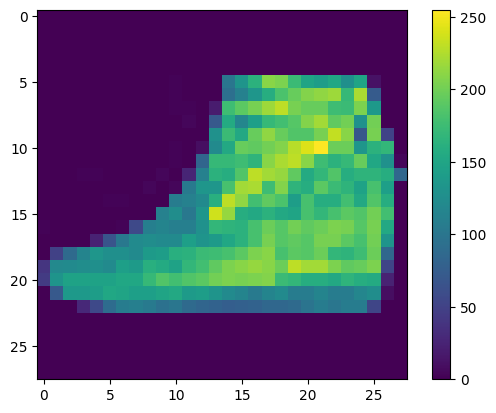

In [7]:
#Visualise the image
plt.imshow(test[250])
plt.colorbar()
plt.show()

#### To make it easy for the NN to process the pixel values, we squeeze them to 0 to 1 by dividing by 255.

In [8]:
train = train/255
test = test/255

## Building the model

In [9]:
model = tf.keras.Sequential([
    layers.Flatten(input_shape = (28,28)),            #Flattens the 28*28 matrix into a single array of len = 784 to ease computation
    layers.Dense(units = 128, activation = 'relu'),   #hidden layer
    layers.Dense(units = 10, activation = 'softmax')  # as 10 outputs are possible
])

## Compling the model
This is hyperparameter tuning where we observe model's performance on changing the optimizers, loss functions, epochs, etc.

In [10]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

## Training the model
Accuracy given here is the training accuracy and is generally high as the model sees the same data many times by epochs

In [11]:
model.fit(train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4990 - accuracy: 0.8255
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3743 - accuracy: 0.8662
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3360 - accuracy: 0.8784
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3115 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2936 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2789 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2671 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2557 - accuracy: 0.9056
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2476 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.237

## Testing the model

In [12]:
test_loss, test_acc = model.evaluate(test, y_test)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3261 - accuracy: 0.8857
0.885699987411499


## Prediction by model

In [13]:
prediction = model.predict(test)

313/313 [==============================] - 1s 2ms/step


In [14]:
print("Predicted:",class_name[np.argmax(prediction[250])])
print("Actual:", class_name[y_test[250]])

Predicted: Ankle boot
Actual: Ankle boot
